# Means of Transportation to Work by Travel Time to Work
Author: Arturo Jacobo (partners with Miranda Mead-Newton).
I am working with data from the Census Reporter titled "Means of Transportation to Work by Travel Time to Work". The dataset includes LA census tracts, different modes of transportation including bus, public transportation, and walking, and travel time to work. I will be exploring this Census Data by creating charts and maps.

# Import the libraries

In [49]:
# import pandas
import pandas as pd

#import geopandas
import geopandas as gpd

#import contextily
import contextily as ctx

#import matplotlib
import matplotlib.pyplot as plt

# Import data

In [50]:
# load the data
tr = gpd.read_file('data/acs2019_5yr_B08134_14000US06037185320.geojson')

# Inspect the data 

To start off, we want to see how many rows and columns are in the dataset. We use `.shape` to do so.

In [51]:
tr.shape

(1005, 243)

There are 1005 rows and 243 columns

Next, we want to see what the first five rows look like using `.head`

In [52]:
tr.head()

geoid                                   name  B08134001  \
0  14000US06037101110  Census Tract 1011.10, Los Angeles, CA     1945.0   
1  14000US06037101122  Census Tract 1011.22, Los Angeles, CA     1757.0   
2  14000US06037101210  Census Tract 1012.10, Los Angeles, CA     2928.0   
3  14000US06037101220  Census Tract 1012.20, Los Angeles, CA     1525.0   
4  14000US06037101300     Census Tract 1013, Los Angeles, CA     1564.0   

   B08134001, Error  B08134002  B08134002, Error  B08134003  B08134003, Error  \
0             257.0       86.0              74.0       82.0              67.0   
1             174.0        9.0              16.0       17.0              20.0   
2             425.0      280.0             202.0      277.0             127.0   
3             183.0       58.0              32.0      151.0              66.0   
4             215.0       57.0              44.0       69.0              53.0   

   B08134004  B08134004, Error  B08134005  B08134005, Error  B08134006  \
0      115.0              63.0      409.0             156.0      183.0   
1       39.0              49.0      161.0              74.0      130.0   
2      310.0             146.0      449.0             174.0      142.0   
3      221.0              79.0      245.0              86.0       29.0   
4      183.0              86.0      289.0              92.0       94.0   

   B08134006, Error  B08134007  B08134007, Error  B08134008  B08134008, Error  \
0              86.0      276.0             115.0      328.0             179.0   
1              57.0      400.0             146.0      317.0              96.0   
2              87.0      625.0             256.0      225.0             123.0   
3              24.0      275.0             103.0      296.0             107.0   
4              63.0      275.0              88.0      156.0              84.0   

   B08134009  B08134009, Error  B08134010  B08134010, Error  B08134011  \
0      187.0              73.0      279.0              94.0     1860.0   
1      364.0             108.0      320.0              90.0     1730.0   
2      305.0             142.0      315.0             139.0     2699.0   
3      107.0              60.0      143.0              67.0     1439.0   
4      212.0             100.0      229.0             103.0     1538.0   

   B08134011, Error  B08134012  B08134012, Error  B08134013  B08134013, Error  \
0             265.0       86.0              74.0       81.0              68.0   
1             178.0        9.0              16.0       17.0              20.0   
2             411.0      266.0             201.0      248.0             122.0   
3             200.0       58.0              32.0      136.0              64.0   
4             214.0       57.0              44.0       69.0              53.0   

   B08134014  B08134014, Error  B08134015  B08134015, Error  B08134016  \
0      115.0              63.0      409.0             156.0      183.0   
1       39.0              49.0      143.0              70.0      130.0   
2      284.0             148.0      434.0             170.0      117.0   
3      194.0              79.0      236.0              86.0       29.0   
4      183.0              86.0      289.0              92.0       94.0   

   B08134016, Error  B08134017  B08134017, Error  B08134018  B08134018, Error  \
0              86.0      265.0             114.0      328.0             179.0   
1              57.0      400.0             146.0      317.0              96.0   
2              88.0      578.0             249.0      225.0             123.0   
3              24.0      275.0             103.0      296.0             107.0   
4              63.0      275.0              88.0      156.0              84.0   

   B08134019  B08134019, Error  B08134020  B08134020, Error  B08134021  \
0      187.0              73.0      206.0              75.0     1656.0   
1      355.0             106.0      320.0              90.0     1617.0   
2      305.0             142.0      242.0             130.0 

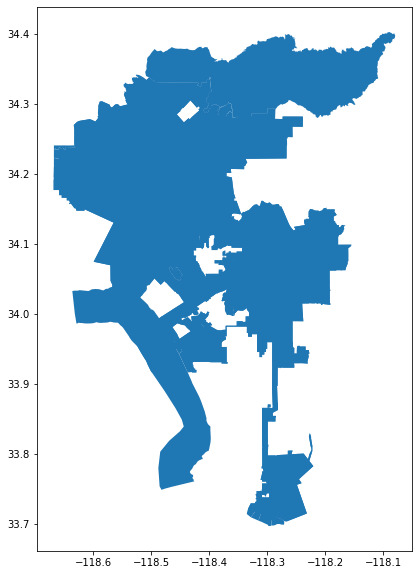

In [5]:
tr.plot(figsize=(10,10))

In [53]:
tr.sample()

geoid                                   name  B08134001  \
320  14000US06037139402  Census Tract 1394.02, Los Angeles, CA     1054.0   

     B08134001, Error  B08134002  B08134002, Error  B08134003  \
320             153.0       54.0              30.0      108.0   

     B08134003, Error  B08134004  B08134004, Error  B08134005  \
320              77.0      115.0              48.0      179.0   

     B08134005, Error  B08134006  B08134006, Error  B08134007  \
320              81.0       12.0              10.0      166.0   

     B08134007, Error  B08134008  B08134008, Error  B08134009  \
320              74.0      103.0              61.0       81.0   

     B08134009, Error  B08134010  B08134010, Error  B08134011  \
320              47.0      236.0              88.0     1017.0   

     B08134011, Error  B08134012  B08134012, Error  B08134013  \
320             150.0       47.0              28.0      108.0   

     B08134013, Error  B08134014  B08134014, Error  B08134015  \
320              77.0      115.0              48.0      179.0   

     B08134015, Error  B08134016  B08134016, Error  B08134017  \
320              81.0       12.0              10.0      166.0   

     B08134017, Error  B08134018  B08134018, Error  B08134019  \
320              74.0       96.0              58.0       68.0   

     B08134019, Error  B08134020  B08134020, Error  B08134021  \
320              43.0      226.0              88.0      934.0   

     B08134021, Error  B08134022  B08134022, Error  B08134023  \
320             136.0       42.0              27.0      101.0   

     B08134023, Error  B08134024  B08134024, Error  B08134025  \
320              81.0      115.0              48.0      171.0   

     B08134025, Error  B08134026  B08134026, Error  B08134027  \
320              83.0        7.0               8.0      139.0   

     B08134027, Error  B08134028  B08134028, Error  B08134029  \
320              67.0       96.0              58.0       43.0   

     B08134029, Error  B08134030  B08134030, Error  B08134031  \
320              28.0      220.0              88.0       83.0   

     B08134031, Error  B08134032  B08134032, Error  B08134033  \
320              56.0        5.0               9.0        7.0   

     B08134033, Error  B08134034  B08134034, Error  B08134035  \
320              10.0        0.0              12.0        8.0   

     B08134035, Error  B08134036  B08134036, Error  B08134037  \
320              14.0        5.0               8.0       27.0   

     B08134037, Error  B08134038  B08134038, Error  B08134039  \
320              35.0        0.0              12.0       25.0   

     B08134039, Error  B08134040  B08134040, Error  B08134041  \
320              35.0        6.0              10.0       72.0   

     B08134041, Error  B08134042  B08134042, Error  B08134043  \
320              55.0        5.0               9.0        7.0   

     B08134043, Error  B08134044  B08134044, Error  B08134045  \
320              10.0        0.0              12.0        0.0   

     B08134045, Error  B08134046  B08134046, Error  B08134047  \
320              12.0        5.0               8.0       27.0   

     B08134047, Error  B08134048  B08134048, Error  B08134049  \
320              35.0        0.0              12.0       22.0   

     B08134049, Error  B08134050  B08134050, Error  B08134051  \
320              35.0        6.0              10.0       11.0   

     B08134051, Error  B08134052  B08134052, Error  B08134053  \
320              15.0        0.0              12.0        0.0   

     B08134053, Error  B08134054  B08134054, Error  B08134055  \
320              12.0        0.0              12.0        8.0   

     B08134055, Error  B08134056  B08134056, Error  B08134057  \
320              14.0        0.0              12.0        0.0   

     B08134057, Error  B08134058  B08134058, Error  B08134059  \
320              12.0        0.0              12.0        3.0   

     B08134059, Error  B08134060  B08134060, Error  B08134061  \

In [56]:
tr.info

<bound method DataFrame.info of                    geoid                                   name  B08134001  \
0     14000US06037101110  Census Tract 1011.10, Los Angeles, CA     1945.0   
1     14000US06037101122  Census Tract 1011.22, Los Angeles, CA     1757.0   
2     14000US06037101210  Census Tract 1012.10, Los Angeles, CA     2928.0   
3     14000US06037101220  Census Tract 1012.20, Los Angeles, CA     1525.0   
4     14000US06037101300     Census Tract 1013, Los Angeles, CA     1564.0   
5     14000US06037101400     Census Tract 1014, Los Angeles, CA     1464.0   
6     14000US06037102103  Census Tract 1021.03, Los Angeles, CA      768.0   
7     14000US06037102104  Census Tract 1021.04, Los Angeles, CA     1333.0   
8     14000US06037102105  Census Tract 1021.05, Los Angeles, CA     1047.0   
9     14000US06037102107  Census Tract 1021.07, Los Angeles, CA     1885.0   
10    14000US06037103101  Census Tract 1031.01, Los Angeles, CA     1177.0   
11    14000US06037103102  Census

# Display the entire table by overriding the default display settings

We have to override the default display settings to display the maximum number of columns and rows.

In [57]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [58]:
tr.sample()

geoid                                name  B08134001  \
84  14000US06037111400  Census Tract 1114, Los Angeles, CA     4513.0   

    B08134001, Error  B08134002  B08134002, Error  B08134003  \
84             596.0      207.0             131.0      344.0   

    B08134003, Error  B08134004  B08134004, Error  B08134005  \
84             184.0      919.0             377.0      588.0   

    B08134005, Error  B08134006  B08134006, Error  B08134007  \
84             231.0      189.0             102.0      765.0   

    B08134007, Error  B08134008  B08134008, Error  B08134009  \
84             275.0      600.0             326.0      301.0   

    B08134009, Error  B08134010  B08134010, Error  B08134011  \
84             188.0      600.0             225.0     4030.0   

    B08134011, Error  B08134012  B08134012, Error  B08134013  \
84             602.0      195.0             128.0      326.0   

    B08134013, Error  B08134014  B08134014, Error  B08134015  \
84             186.0      838.0             372.0      588.0   

    B08134015, Error  B08134016  B08134016, Error  B08134017  \
84             231.0      189.0             102.0      579.0   

    B08134017, Error  B08134018  B08134018, Error  B08134019  \
84             256.0      542.0             312.0      278.0   

    B08134019, Error  B08134020  B08134020, Error  B08134021  \
84             184.0      495.0             187.0     3358.0   

    B08134021, Error  B08134022  B08134022, Error  B08134023  \
84             547.0      180.0             124.0      210.0   

    B08134023, Error  B08134024  B08134024, Error  B08134025  \
84             139.0      772.0             366.0      505.0   

    B08134025, Error  B08134026  B08134026, Error  B08134027  \
84             220.0      159.0              97.0      513.0   

    B08134027, Error  B08134028  B08134028, Error  B08134029  \
84             244.0      481.0             305.0      222.0   

    B08134029, Error  B08134030  B08134030, Error  B08134031  \
84             173.0      316.0             145.0      672.0   

    B08134031, Error  B08134032  B08134032, Error  B08134033  \
84             255.0       15.0              26.0      116.0   

    B08134033, Error  B08134034  B08134034, Error  B08134035  \
84             113.0       66.0              79.0       83.0   

    B08134035, Error  B08134036  B08134036, Error  B08134037  \
84              80.0       30.0              49.0       66.0   

    B08134037, Error  B08134038  B08134038, Error  B08134039  \
84              49.0       61.0              99.0       56.0   

    B08134039, Error  B08134040  B08134040, Error  B08134041  \
84              60.0      179.0             115.0      430.0   

    B08134041, Error  B08134042  B08134042, Error  B08134043  \
84             228.0       15.0              26.0       95.0   

    B08134043, Error  B08134044  B08134044, Error  B08134045  \
84             109.0        0.0              17.0       67.0   

    B08134045, Error  B08134046  B08134046, Error  B08134047  \
84              76.0       30.0              49.0       20.0   

    B08134047, Error  B08134048  B08134048, Error  B08134049  \
84              34.0       61.0              99.0       41.0   

    B08134049, Error  B08134050  B08134050, Error  B08134051  \
84              57.0      101.0              97.0      242.0   

    B08134051, Error  B08134052  B08134052, Error  B08134053  \
84             139.0        0.0              17.0       21.0   

    B08134053, Error  B08134054  B08134054, Error  B08134055  \
84              34.0       66.0              79.0       16.0   

    B08134055, Error  B08134056  B08134056, Error  B08134057  \
84              27.0        0.0              17.0       46.0   

    B08134057, Error  B08134058  B08134058, Error  B08134059  \
84              45.0        0.0              17.0       15.0   

    B08134059, Error  B08134060  B08134060, Error  B08134061  \
84              23.0       78.0              75.0      227.0   



# Delete the last row using `.drop` command

We want to delete the last row because it gives us information for all of Los Angeles and we only want information for each census tract.

In [59]:
tr.tail()

geoid                                   name  B08134001  \
1000  14000US06037980026  Census Tract 9800.26, Los Angeles, CA        5.0   
1001  14000US06037980028  Census Tract 9800.28, Los Angeles, CA        0.0   
1002  14000US06037980031  Census Tract 9800.31, Los Angeles, CA       24.0   
1003  14000US06037990200     Census Tract 9902, Los Angeles, CA        0.0   
1004      16000US0644000                        Los Angeles, CA  1841598.0   

      B08134001, Error  B08134002  B08134002, Error  B08134003  \
1000               8.0        0.0              12.0        0.0   
1001              12.0        0.0              12.0        0.0   
1002              27.0       15.0              26.0        9.0   
1003              12.0        0.0              12.0        0.0   
1004            6239.0   107784.0            2748.0   170859.0   

      B08134003, Error  B08134004  B08134004, Error  B08134005  \
1000              12.0        0.0              12.0        0.0   
1001              12.0        0.0              12.0        0.0   
1002               7.0        0.0              12.0        0.0   
1003              12.0        0.0              12.0        0.0   
1004            2908.0   229791.0            3044.0   249549.0   

      B08134005, Error  B08134006  B08134006, Error  B08134007  \
1000              12.0        0.0              12.0        0.0   
1001              12.0        0.0              12.0        0.0   
1002              12.0        0.0              12.0        0.0   
1003              12.0        0.0              12.0        0.0   
1004            3521.0   100256.0            2216.0   363272.0   

      B08134007, Error  B08134008  B08134008, Error  B08134009  \
1000              12.0        0.0              12.0        5.0   
1001              12.0        0.0              12.0        0.0   
1002              12.0        0.0              12.0        0.0   
1003              12.0        0.0              12.0        0.0   
1004            4328.0   157655.0            2658.0   199387.0   

      B08134009, Error  B08134010  B08134010, Error  B08134011  \
1000               8.0        0.0              12.0        5.0   
1001              12.0        0.0              12.0        0.0   
1002              12.0        0.0              12.0       15.0   
1003              12.0        0.0              12.0        0.0   
1004            3270.0   263045.0            3264.0  1541762.0   

      B08134011, Error  B08134012  B08134012, Error  B08134013  \
1000               8.0        0.0              12.0        0.0   
1001              12.0        0.0              12.0        0.0   
1002              26.0       15.0              26.0        0.0   
1003              12.0        0.0              12.0        0.0   
1004            6099.0    78117.0            2571.0   141541.0   

      B08134013, Error  B08134014  B08134014, Error  B08134015  \
1000              12.0        0.0              12.0        0.0   
1001              12.0        0.0              12.0        0.0   
1002              12.0        0.0              12.0        0.0   
1003              12.0        0.0              12.0        0.0   
1004            2734.0   200879.0            2866.0   222364.0   

      B08134015, Error  B08134016  B08134016, Error  B08134017  \
1000              12.0        0.0              12.0        0.0   
1001              12.0        0.0              12.0        0.0   
1002              12.0        0.0              12.0        0.0   
1003              12.0        0.0              12.0        0.0   
1004            3240.0    91279.0            2135.0   313935.0   

      B08134017, Error  B08134018  B08134018, Error  B08134019  \
1000              12.0        0.0              12.0        5.0   
1001              12.0        0.0              12.0        0.0   
1002              12.0        0.0              12.0        0.0   
1003              12.0        0.0              12.0        0.0   
1004            4258.0   138416.0           

We want to drop the last row using the `.drop` command.

In [60]:
# the index 0 indicates the first row which is the county row
tr = tr.drop([1004])

Use `.head` command to ensure that the last row was deleted.

In [61]:
tr.head()

geoid                                   name  B08134001  \
0  14000US06037101110  Census Tract 1011.10, Los Angeles, CA     1945.0   
1  14000US06037101122  Census Tract 1011.22, Los Angeles, CA     1757.0   
2  14000US06037101210  Census Tract 1012.10, Los Angeles, CA     2928.0   
3  14000US06037101220  Census Tract 1012.20, Los Angeles, CA     1525.0   
4  14000US06037101300     Census Tract 1013, Los Angeles, CA     1564.0   

   B08134001, Error  B08134002  B08134002, Error  B08134003  B08134003, Error  \
0             257.0       86.0              74.0       82.0              67.0   
1             174.0        9.0              16.0       17.0              20.0   
2             425.0      280.0             202.0      277.0             127.0   
3             183.0       58.0              32.0      151.0              66.0   
4             215.0       57.0              44.0       69.0              53.0   

   B08134004  B08134004, Error  B08134005  B08134005, Error  B08134006  \
0      115.0              63.0      409.0             156.0      183.0   
1       39.0              49.0      161.0              74.0      130.0   
2      310.0             146.0      449.0             174.0      142.0   
3      221.0              79.0      245.0              86.0       29.0   
4      183.0              86.0      289.0              92.0       94.0   

   B08134006, Error  B08134007  B08134007, Error  B08134008  B08134008, Error  \
0              86.0      276.0             115.0      328.0             179.0   
1              57.0      400.0             146.0      317.0              96.0   
2              87.0      625.0             256.0      225.0             123.0   
3              24.0      275.0             103.0      296.0             107.0   
4              63.0      275.0              88.0      156.0              84.0   

   B08134009  B08134009, Error  B08134010  B08134010, Error  B08134011  \
0      187.0              73.0      279.0              94.0     1860.0   
1      364.0             108.0      320.0              90.0     1730.0   
2      305.0             142.0      315.0             139.0     2699.0   
3      107.0              60.0      143.0              67.0     1439.0   
4      212.0             100.0      229.0             103.0     1538.0   

   B08134011, Error  B08134012  B08134012, Error  B08134013  B08134013, Error  \
0             265.0       86.0              74.0       81.0              68.0   
1             178.0        9.0              16.0       17.0              20.0   
2             411.0      266.0             201.0      248.0             122.0   
3             200.0       58.0              32.0      136.0              64.0   
4             214.0       57.0              44.0       69.0              53.0   

   B08134014  B08134014, Error  B08134015  B08134015, Error  B08134016  \
0      115.0              63.0      409.0             156.0      183.0   
1       39.0              49.0      143.0              70.0      130.0   
2      284.0             148.0      434.0             170.0      117.0   
3      194.0              79.0      236.0              86.0       29.0   
4      183.0              86.0      289.0              92.0       94.0   

   B08134016, Error  B08134017  B08134017, Error  B08134018  B08134018, Error  \
0              86.0      265.0             114.0      328.0             179.0   
1              57.0      400.0             146.0      317.0              96.0   
2              88.0      578.0             249.0      225.0             123.0   
3              24.0      275.0             103.0      296.0             107.0   
4              63.0      275.0              88.0      156.0              84.0   

   B08134019  B08134019, Error  B08134020  B08134020, Error  B08134021  \
0      187.0              73.0      206.0              75.0     1656.0   
1      355.0             106.0      320.0              90.0     1617.0   
2      305.0             142.0      242.0             130.0 

# Drop unneeded columns

Output the existing columns.

In [62]:
list(tr)

['geoid',
 'name',
 'B08134001',
 'B08134001, Error',
 'B08134002',
 'B08134002, Error',
 'B08134003',
 'B08134003, Error',
 'B08134004',
 'B08134004, Error',
 'B08134005',
 'B08134005, Error',
 'B08134006',
 'B08134006, Error',
 'B08134007',
 'B08134007, Error',
 'B08134008',
 'B08134008, Error',
 'B08134009',
 'B08134009, Error',
 'B08134010',
 'B08134010, Error',
 'B08134011',
 'B08134011, Error',
 'B08134012',
 'B08134012, Error',
 'B08134013',
 'B08134013, Error',
 'B08134014',
 'B08134014, Error',
 'B08134015',
 'B08134015, Error',
 'B08134016',
 'B08134016, Error',
 'B08134017',
 'B08134017, Error',
 'B08134018',
 'B08134018, Error',
 'B08134019',
 'B08134019, Error',
 'B08134020',
 'B08134020, Error',
 'B08134021',
 'B08134021, Error',
 'B08134022',
 'B08134022, Error',
 'B08134023',
 'B08134023, Error',
 'B08134024',
 'B08134024, Error',
 'B08134025',
 'B08134025, Error',
 'B08134026',
 'B08134026, Error',
 'B08134027',
 'B08134027, Error',
 'B08134028',
 'B08134028, Error',
 

Define which columns we want to keep using 'columns_to_keep.

In [63]:
columns_to_keep = ['geoid',
 'name',
 'B08134001',
 'B08134007',
 'B08134011',
 'B08134017',
 'B08134021',
 'B08134027',
 'B08134031',
 'B08134037',
 'B08134061',
 'B08134067',
 'B08134071',
 'B08134077',
 'B08134081',
 'B08134087',
 'B08134101',
 'B08134107',
 'B08134111',
 'B08134117',
 'geometry']

Redefine the variable 'tr' as 'columns to keep'.

In [64]:
tr = tr[columns_to_keep]

Use `.head` command to display trimmed dataset.

In [65]:
tr.head()

geoid                                   name  B08134001  \
0  14000US06037101110  Census Tract 1011.10, Los Angeles, CA     1945.0   
1  14000US06037101122  Census Tract 1011.22, Los Angeles, CA     1757.0   
2  14000US06037101210  Census Tract 1012.10, Los Angeles, CA     2928.0   
3  14000US06037101220  Census Tract 1012.20, Los Angeles, CA     1525.0   
4  14000US06037101300     Census Tract 1013, Los Angeles, CA     1564.0   

   B08134007  B08134011  B08134017  B08134021  B08134027  B08134031  \
0      276.0     1860.0      265.0     1656.0      259.0      204.0   
1      400.0     1730.0      400.0     1617.0      378.0      113.0   
2      625.0     2699.0      578.0     2430.0      481.0      269.0   
3      275.0     1439.0      275.0     1323.0      245.0      116.0   
4      275.0     1538.0      275.0     1457.0      257.0       81.0   

   B08134037  B08134061  B08134067  B08134071  B08134077  B08134081  \
0        6.0       59.0       10.0       36.0       10.0       23.0   
1       22.0        9.0        0.0        0.0        0.0        9.0   
2       97.0       68.0        0.0       68.0        0.0        0.0   
3       30.0       48.0        0.0       48.0        0.0        0.0   
4       18.0       26.0        0.0       26.0        0.0        0.0   

   B08134087  B08134101  B08134107  B08134111  B08134117  \
0        0.0        0.0        0.0       26.0        1.0   
1        0.0       10.0        0.0        8.0        0.0   
2        0.0       74.0       31.0       87.0       16.0   
3        0.0        8.0        0.0       30.0        0.0   
4        0.0        0.0        0.0        0.0        0.0   

                                            geometry  
0  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...  
1  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...  
2  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...  
3  MULTIPOLYGON (((-118.28593 34.25227, -118.2859...  
4  MULTIPOLYGON (((-118.27822 34.25068, -118.2782...

# Rename the columns

Use `list()` to define current columns.

In [66]:
list(tr)

['geoid',
 'name',
 'B08134001',
 'B08134007',
 'B08134011',
 'B08134017',
 'B08134021',
 'B08134027',
 'B08134031',
 'B08134037',
 'B08134061',
 'B08134067',
 'B08134071',
 'B08134077',
 'B08134081',
 'B08134087',
 'B08134101',
 'B08134107',
 'B08134111',
 'B08134117',
 'geometry']

Rename the columns.

In [67]:
tr.columns = ['geoid',
 'name',
 'Total',
 '30 to 34 minutes',
 'Car, truck, or van',
 '30 to 34 minutes',
 'Drove alone',
 '30 to 34 minutes',
 'Carpooled',
 '30 to 34 minutes',
 'Public transportation (excluding taxicab)',
 '30 to 34 minutes',
 'Bus',
 '30 to 34 minutes',
 'Subway or elevated rail, Light rail, streetcar, or trolley (carro p\u00fablico in Puerto Rico)',
 '30 to 34 minutes',
 'Walked',
 '30 to 34 minutes',
 'Taxicab, motorcycle, bicycle, or other means',
 '30 to 34 minutes',
 'geometry']

Use `.head` command to dispaly renamed columns.

In [68]:
tr.head()

geoid                                   name   Total  \
0  14000US06037101110  Census Tract 1011.10, Los Angeles, CA  1945.0   
1  14000US06037101122  Census Tract 1011.22, Los Angeles, CA  1757.0   
2  14000US06037101210  Census Tract 1012.10, Los Angeles, CA  2928.0   
3  14000US06037101220  Census Tract 1012.20, Los Angeles, CA  1525.0   
4  14000US06037101300     Census Tract 1013, Los Angeles, CA  1564.0   

   30 to 34 minutes  Car, truck, or van  30 to 34 minutes  Drove alone  \
0             276.0              1860.0             265.0       1656.0   
1             400.0              1730.0             400.0       1617.0   
2             625.0              2699.0             578.0       2430.0   
3             275.0              1439.0             275.0       1323.0   
4             275.0              1538.0             275.0       1457.0   

   30 to 34 minutes  Carpooled  30 to 34 minutes  \
0             259.0      204.0               6.0   
1             378.0      113.0              22.0   
2             481.0      269.0              97.0   
3             245.0      116.0              30.0   
4             257.0       81.0              18.0   

   Public transportation (excluding taxicab)  30 to 34 minutes   Bus  \
0                                       59.0              10.0  36.0   
1                                        9.0               0.0   0.0   
2                                       68.0               0.0  68.0   
3                                       48.0               0.0  48.0   
4                                       26.0               0.0  26.0   

   30 to 34 minutes  \
0              10.0   
1               0.0   
2               0.0   
3               0.0   
4               0.0   

   Subway or elevated rail, Light rail, streetcar, or trolley (carro público in Puerto Rico)  \
0                                               23.0                                           
1                                                9.0                                           
2                                                0.0                                           
3                                                0.0                                           
4                                                0.0                                           

   30 to 34 minutes  Walked  30 to 34 minutes  \
0               0.0     0.0               0.0   
1               0.0    10.0               0.0   
2               0.0    74.0              31.0   
3               0.0     8.0               0.0   
4               0.0     0.0               0.0   

   Taxicab, motorcycle, bicycle, or other means  30 to 34 minutes  \
0                                          26.0               1.0   
1                                           8.0               0.0   
2                                          87.0              16.0   
3                                          30.0               0.0   
4                                           0.0               0.0   

                                            geometry  
0  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...  
1  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...  
2  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...  
3  MULTIPOLYGON (((-118.28593 34.25227, -118.2859...  
4  MULTIPOLYGON (((-118.27822 34.25068, -118.2782...

Use `.plot.hist` command to plot a histogram.

# Sort Data

In [69]:
tr_sorted[['geoid','Bus']].head(10)

geoid       Bus
1004      16000US0644000  153009.0
569   14000US06037209402    1510.0
563   14000US06037209102    1488.0
562   14000US06037208904    1125.0
557   14000US06037208720    1029.0
561   14000US06037208903     973.0
550   14000US06037208401     939.0
570   14000US06037209403     878.0
560   14000US06037208902     836.0
568   14000US06037209401     821.0

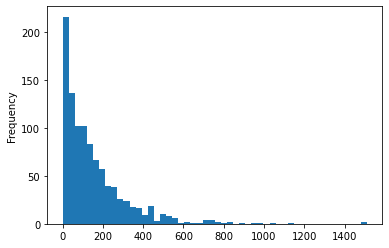

In [70]:
tr['Bus'].plot.hist(bins=50)

# Plot tracts

 Plot tracts using `.plot`.

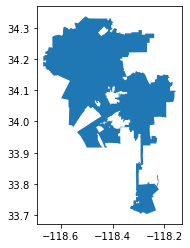

In [71]:
tr_sorted.head(200).plot()

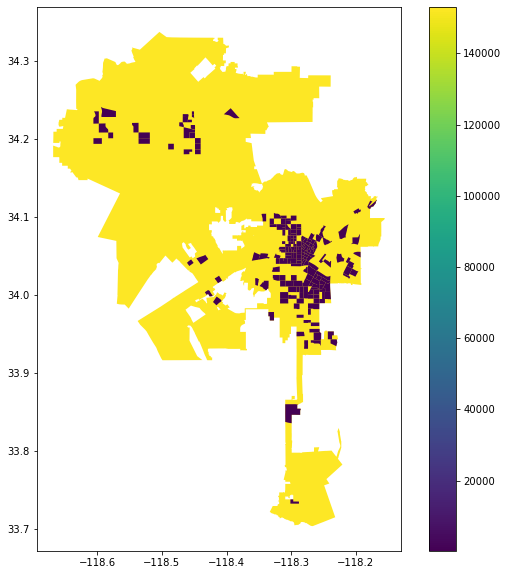

In [41]:
tr_sorted.head(200).plot(figsize=(10,10),column='Bus', legend=True)

# Map

Create a choropleth map.

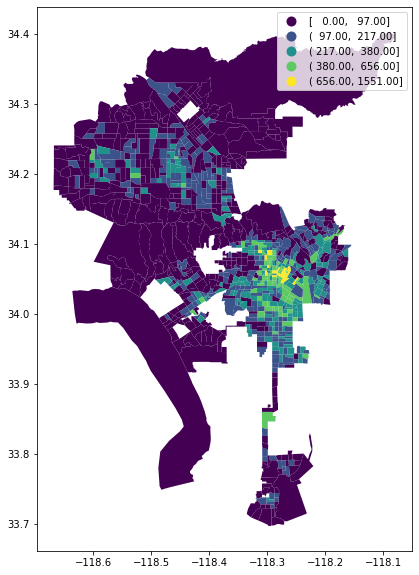

In [72]:
tr.plot(figsize=(12,10), column='Public transportation (excluding taxicab)', legend= True, scheme= 'NaturalBreaks' )

Looks cool!